# COVID TWEET ANALYSIS

This noted book contains analysis on coivd'19 tweets on twitter. A sentiment predicter model is built. 
Data sourced from kaggle

I hope you will enjoy it. 

references:
    

## 1. Data Importation

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

In [2]:
#Loading the Dataset

train = pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\Data\NLP\Corona_NLP_train.csv', encoding='latin1') #training dataset
test = pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\Data\NLP\Corona_NLP_test.csv', encoding='latin1') #testing dataset

Data = pd.concat([train,test], axis = 0, join = 'inner',) #Merged Data

In [3]:
#A Sample of the entire Dataset 
Data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16/03/2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16/03/2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16/03/2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16/03/2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [4]:
#Smaple of traing Dataset: data used to train the model
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#Sample of test Dataset: data used to test the model
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02/03/2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02/03/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02/03/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02/03/2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03/03/2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
#A random tweet in the dataset
train['OriginalTweet'][2]

'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P'

In [8]:
#Information on the training Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


The UserName and ScreenName are the only integers (numerics),the rest are objective (alphabets)

In [9]:
# train Dataset description
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


UserName and ScreenName being the only numerical variable were described. the numerical variables represents twitter usersnames and screenname for pivacy reasons

In [10]:
#Converting Tweets to strings

train['Text'] = train.OriginalTweet
train['Text'] = train['Text'].astype(str)

test['Text'] = test.OriginalTweet
test['Text'] = test['Text'].astype(str)

In [11]:
#Shape of dataset
print('Shape of train dataset: {}'.format(train.shape))
print('Shape of test dataset: {}'.format(test.shape))

Shape of train dataset: (41157, 7)
Shape of test dataset: (3798, 7)


The train data has 41157 rows, whiles test dataset has 3798. Both datast has same number of columns

In [12]:
#The variouse variable in the train data
train.keys()

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Text'],
      dtype='object')

In [13]:
#Checking for variables in the data
print('The columns of the dataset {}'.format(Data.keys()))

The columns of the dataset Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


### Data Visualisation

In [14]:
#import libraries for data visualisation
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### LENGTH OF TWEET

In [15]:
#Getting the length of the tweets
train['Length'] = train['OriginalTweet'].apply(len)
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text,Length
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,111
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,237
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,131
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,306
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV...",310
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,102
41153,44952,89904,NaN,14/04/2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,138
41154,44953,89905,NaN,14/04/2020,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when @KameronWild...,136
41155,44954,89906,NaN,14/04/2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,111


A new columns is created to contain length of every tweets

In [18]:
#Description of length of tweets
train['Length'].describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: Length, dtype: float64

In [18]:
#Least lengthy tweet

print('Least Tweets with length 11')
train[train['Length']==11]['OriginalTweet']

Least Tweets with length 11


9776     Be like Bob
16872    Cartoon for
20467    Omg y all  
35526          amp  
Name: OriginalTweet, dtype: object

We found out the least lengthy tweets were three. Interestingly spaces within the spaces are counted as length. The first tweet
has three(3) words with nine(9) letters and two spaces making eleven(11) length

In [19]:
#Most Lengthy tweet
print('Most lengthy tweets 355')
train[train['Length']==355]['OriginalTweet'].iloc[0]

Most lengthy tweets 355


'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

Text(0.5, 1.0, 'Distribution of Length')

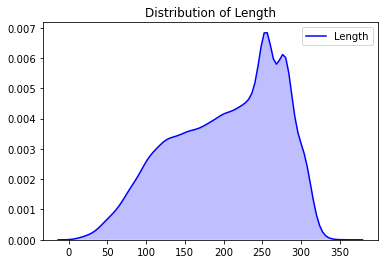

In [20]:
#Visualisation of length distribution
sns.kdeplot(data = train['Length'],shade = True, color = 'b',).set_title('Distribution of Length')

The length is distributed around. Meaning most of the tweets had length around 200 and 350

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002136CDE2188>,
      dtype=object)

<Figure size 864x432 with 0 Axes>

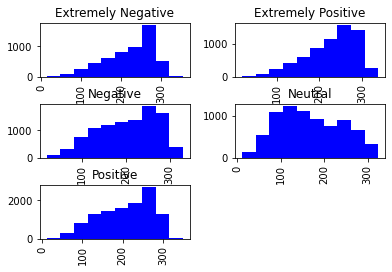

In [21]:
#The distribution of length among the sentiments
plt.figure(figsize=(12,6))
train.hist(column = 'Length', by = 'Sentiment',color = 'b')

The distrbution for most of the sentiment looks skewed towards the right except Neutral.

In [22]:
Data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16/03/2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16/03/2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16/03/2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16/03/2020,Gov need to do somethings instead of biar je r...,Extremely Negative


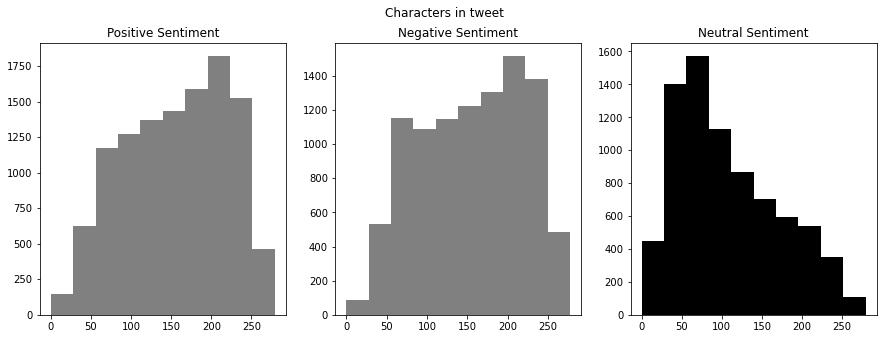

<Figure size 432x288 with 0 Axes>

In [98]:
#Characters in a tweet

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))

Positive_Len = train[train['Sentiment']=='Positive']['Text'].str.len()
ax1.hist(Positive_Len, color = 'gray')
ax1.set_title('Positive Sentiment')

Negative_Len = train[train['Sentiment']=='Negative']['Text'].str.len()
ax2.hist(Negative_Len, color = 'gray')
ax2.set_title('Negative Sentiment')

Neutral_Len = train[train['Sentiment']=='Neutral']['Text'].str.len()
ax3.hist(Neutral_Len, color = 'Black')
ax3.set_title('Neutral Sentiment')

fig.suptitle('Characters in tweet')
plt.show()
plt.savefig(r'C:\Users\User\Desktop\Data Analysis\Saved\Twit3')

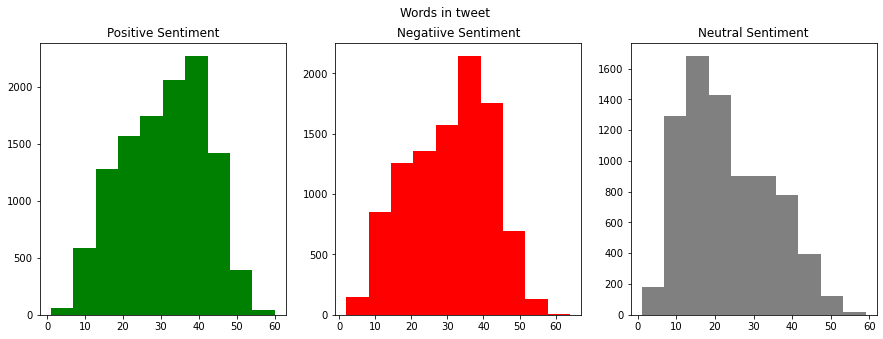

<Figure size 432x288 with 0 Axes>

In [24]:
#Words in a tweet

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))

Positive_Len = train[train['Sentiment']=='Positive']['Text'].str.split().map(lambda x: len(x))
ax1.hist(Positive_Len, color = 'green')
ax1.set_title('Positive Sentiment')

Negative_Len = train[train['Sentiment']=='Negative']['Text'].str.split().map(lambda x: len(x))
ax2.hist(Negative_Len, color = 'red')
ax2.set_title('Negatiive Sentiment')

Neutral_Len = train[train['Sentiment']=='Neutral']['Text'].str.split().map(lambda x: len(x))
ax3.hist(Neutral_Len, color = 'gray')
ax3.set_title('Neutral Sentiment')

fig.suptitle('Words in tweet')
plt.show()
plt.savefig(r'C:\Users\User\Desktop\Data Analysis\Saved\Twit4')

The words in tweet has similar distribution with the Length. The number of words in tweet is the length minus the spaces

In [25]:
#Tweets from Ghanaian about the Covid19
train[train['Location']=='Ghana']['OriginalTweet']

2877     Foreigner Dragged Out Of Supermarket After Ref...
3942     #Coronavirus increases Chinese phones #prices ...
10044    The energy you're using to insult us\r\r\nWhy ...
10238     Akpeteshie  shortage hits Takoradi as sanitiz...
13237    Coronavirus Rwanda fines 44 company for hiking...
14409    See Vladimir Putin's response to the hiking of...
15128    In this season of COVID-19 outbreak you can't ...
15957    Putin say make dem revoke the shops n companie...
18360    The reasons most of these traders are giving f...
21106    @GovWike We will like to partner with the stat...
22187    Hmmmm this lockdown things wonÂt be easy ooo....
22565    AMG General means business! He blessed Tema Ge...
23213    Thoroughly wash your hands with soap under run...
24240    CityDia was the first Supermarket chain in Gha...
25414    COVID-19-Lock-Down-Don039t-Panic-There-Is-More...
25870    Kenyan manufacturers unveil online shopping #p...
29486    World food prices declined sharply in March, d.

In [26]:
train[train['Location']=='Ghana']['Sentiment'].value_counts()

Positive              8
Neutral               7
Negative              5
Extremely Positive    4
Extremely Negative    1
Name: Sentiment, dtype: int64

### LOCATION

In [27]:
#Location of the tweets
train['Location'].describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

London has the most appearance followed by American cities. Unfortunately there lot empty and incomplete data for the location variable 

In [28]:
#The various locations with frequnecy
train.Location.value_counts(normalize=False).head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [29]:
#Total number of empty cells in location variable
train['Location'].isnull().sum()

8590

### Sentiments

In [30]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Most of the tweets are tagged as positive

Text(0.5, 1.0, 'Train Sentiment Distribution')

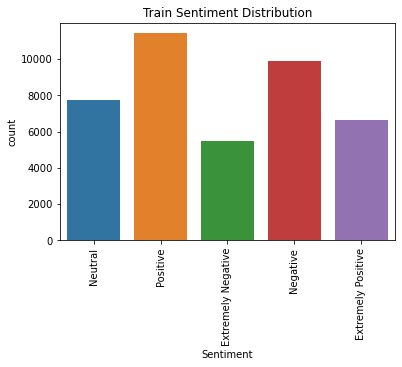

In [31]:
sns.countplot(x='Sentiment',data= train)
plt.xticks(rotation= '90')
plt.title(label= 'Train Sentiment Distribution')

Text(0.5, 1.0, 'Test Sentiment Distribution')

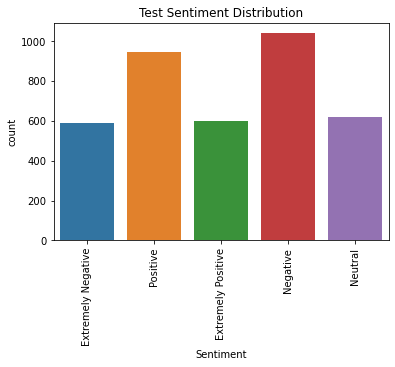

In [32]:
sns.countplot(x='Sentiment',data= test)
plt.xticks(rotation= '90')
plt.title(label= 'Test Sentiment Distribution')

In [33]:
#Grouping the data into respective sentiments
Extreme_Negative = train[train['Sentiment']=='Extremely_Negative']
Extreme_Positive = train[train['Sentiment']=='Extremely_Positive']
Negative = train[train['Sentiment']=='Negative']
Positive = train[train['Sentiment']=='Positive']
Neutral = train[train['Sentiment']=='Neutral']

In [34]:
Negative

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text,Length
9,3808,48760,"BHAVNAGAR,GUJRAT",16/03/2020,"For corona prevention,we should stop to buy th...",Negative,"For corona prevention,we should stop to buy th...",267
24,3823,48775,Downstage centre,16/03/2020,@10DowningStreet @grantshapps what is being do...,Negative,@10DowningStreet @grantshapps what is being do...,255
26,3825,48777,"Ketchum, Idaho",16/03/2020,In preparation for higher demand and a potenti...,Negative,In preparation for higher demand and a potenti...,202
28,3827,48779,"New York, NY",16/03/2020,Do you see malicious price increases in NYC? T...,Negative,Do you see malicious price increases in NYC? T...,286
30,3829,48781,NaN,16/03/2020,There Is of in the Country The more empty she...,Negative,There Is of in the Country The more empty she...,114
...,...,...,...,...,...,...,...,...
41127,44926,89878,NaN,14/04/2020,Today at the grocery store I saw someone getti...,Negative,Today at the grocery store I saw someone getti...,275
41131,44930,89882,"Accra, Ghana",14/04/2020,In every human affliction there are gainers a...,Negative,In every human affliction there are gainers a...,278
41147,44946,89898,"Brooklyn, NY",14/04/2020,YÂall really shitting that much more at home?...,Negative,YÂall really shitting that much more at home?...,82
41149,44948,89900,"Toronto, Ontario",14/04/2020,Still shocked by the number of #Toronto superm...,Negative,Still shocked by the number of #Toronto superm...,177


In [35]:
train['Sentiment'].isnull().sum()

0

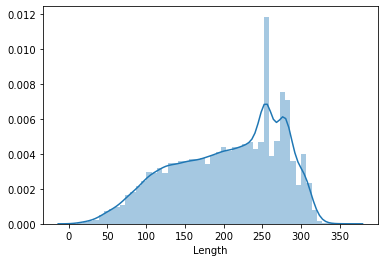

In [36]:
#A distributive plot for Length
sns.distplot(a = train['Length'],hist=True)

## Text Transformation and Analysis

In [37]:
#Converting Sentiments to numerics

def sentiment(x):
    if x == 'Extremely Positive':
        return '2'
    elif x == 'Positive':
        return '2'
    elif x == 'Extremely Negative':
        return '0'
    elif x == 'Neutral':
        return '1'
    else:
        return '0'

In [38]:
train['Label'] = train['Sentiment'].apply(sentiment)
test['Label'] = test['Sentiment'].apply(sentiment)

In [39]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text,Length,Label
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,111,1
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,237,2
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,131,2
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,306,2
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV...",310,0
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,102,1
41153,44952,89904,NaN,14/04/2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,138,0
41154,44953,89905,NaN,14/04/2020,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when @KameronWild...,136,2
41155,44954,89906,NaN,14/04/2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,111,1


2    18046
0    15398
1     7713
Name: Label, dtype: int64


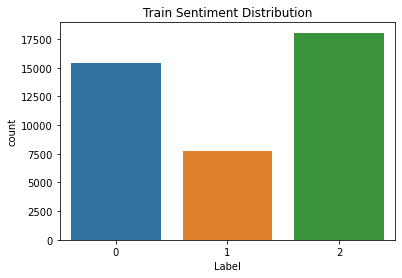

In [40]:
sns.countplot(x='Label', data=train)
plt.title('Train Sentiment Distribution')
print(train.Label.value_counts())


0    1633
2    1546
1     619
Name: Label, dtype: int64


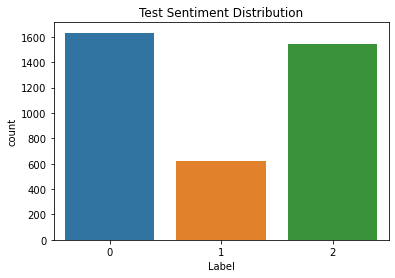

In [41]:
sns.countplot(x='Label', data=test)
plt.title('Test Sentiment Distribution')
print(test.Label.value_counts())

### Data cleaning

In [42]:
#Remove mentions and hashtags
def remove_mentions(text):
    mentions = re.sub('\w*\@\w*','',text)
    return mentions
train['Text'] = train['Text'].apply(lambda x: remove_mentions(x))
test['Text'] = test['Text'].apply(lambda x: remove_mentions(x))

In [43]:
#Remove hashtags
def remove_hashtags(text):
    hashtags = re.sub('\w*\#\w*','',text)
    return hashtags
train['Text'] = train['Text'].apply(lambda x: remove_hashtags(x))
test['Text'] = test['Text'].apply(lambda x: remove_hashtags(x))

In [44]:
def words_bracket(text):
    bracket = re.sub('\[.*?\]','',text)
    return bracket
train['Text'] = train['Text'].apply(lambda x: words_bracket(x))
test['Text'] = test['Text'].apply(lambda x: words_bracket(x))

In [45]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile('https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
train['Text']=train['Text'].apply(lambda x:remove_urls(x))
test['Text']=test['Text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile('<.*?>')
    return html.sub('',text)
train['Text']=train['Text'].apply(lambda x:remove_html(x))
test['Text']=test['Text'].apply(lambda x:remove_html(x))

In [46]:
#Lowercase Characters
def lower(text):
    low_text = text.lower()
    return low_text
train['Text'] = train['Text'].apply(lambda x: lower(x))
test['Text'] = test['Text'].apply(lambda x: lower(x))

In [47]:
#Remove numbers
def remove_number(text):
    number_remove = re.sub(r'\d+\r', '',text)
    return number_remove
train['Text'] = train['Text'].apply(lambda x: remove_number(x))
test['Text'] = test['Text'].apply(lambda x: remove_number(x))

In [48]:
#Removing stopswords and punctuations
def remove_punct(text):
    punct_remove = re.sub('[^\w\s\d]','',text)
    return punct_remove
train['Text'] = train['Text'].apply(lambda x: remove_punct(x))
test['Text'] = test['Text'].apply(lambda x: remove_punct(x))

In [49]:
def remove_space(text):
    space_remove = re.sub('\s+\r\n','',text).strip()
    return space_remove
train['Text'] = train['Text'].apply(lambda x: remove_space(x))
test['Text'] = test['Text'].apply(lambda x: remove_space(x))

In [50]:
#Removing Covid related words
Covidwords = ['COVID_19','covid19','Covid19','Coronavirus','covid']

def remove_covid(text):
    for character in Covidwords:
        text = text.replace(character,'')
    return text
train['Text'] = train['Text'].apply(lambda x: remove_covid(x))
test['Text'] = test['Text'].apply(lambda x: remove_covid(x))

In [51]:
#Original Tweet
train[train['Location']=='Ghana']['OriginalTweet'].iloc[0]

'Foreigner Dragged Out Of Supermarket After Refusing To Use Hand Sanitizer Yet Touching Items On  Shelves [Watch]\r\r\n\r\r\n#CoronaVirusNigeria #FightCOVID19 #CoronaVirusUpdate #CoronaVirus #ghana #ajrnews #COVID19Ghana #covid19 #StopTheSpread https://t.co/C9oUEvJ1gr'

In [52]:
#Cleaned Tweet
train[train['Location']=='Ghana']['Text'].iloc[0]

'foreigner dragged out of supermarket after refusing to use hand sanitizer yet touching items on  shelves'

In [53]:
def text_cleaning(One):
    One = One.lower()
    One = re.sub('\w*\#\w*','',One)
    One = re.sub('\w*\@\w*','',One)
    One = re.sub('\[.*?\]','',One)
    One = re.sub('<.*?>','',One)
    One = re.sub('<.*?>','',One)
    One = re.sub('https?://\S+|www\.\S+','',One)
    One = re.sub('\d+\r','',One)
    One = re.sub('[%s]' % re.escape(string.punctuation),'',One)
    One = re.sub('[^\w\s\d]','',One)
    One = re.sub('\s+\r\n','',One).strip()
    One = re.sub('\n','',One)
    One = re.sub('\w*\d\w*','',One)
    return One

In [54]:
train.copy()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text,Length,Label
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,111,1
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,237,2
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,131,2
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,306,2
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,310,0
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,102,1
41153,44952,89904,NaN,14/04/2020,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing rel...,138,0
41154,44953,89905,NaN,14/04/2020,You know itÂs getting tough when @KameronWild...,Positive,you know itâs getting tough when is rationin...,136,2
41155,44954,89906,NaN,14/04/2020,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,111,1


In [55]:
#Original Tweet
train[train['Location']=='Ghana']['OriginalTweet'].iloc[0]

'Foreigner Dragged Out Of Supermarket After Refusing To Use Hand Sanitizer Yet Touching Items On  Shelves [Watch]\r\r\n\r\r\n#CoronaVirusNigeria #FightCOVID19 #CoronaVirusUpdate #CoronaVirus #ghana #ajrnews #COVID19Ghana #covid19 #StopTheSpread https://t.co/C9oUEvJ1gr'

In [56]:
#Cleaned Tweet
train[train['Location']=='Ghana']['Text'].iloc[0]

'foreigner dragged out of supermarket after refusing to use hand sanitizer yet touching items on  shelves'

In [57]:
train[train['Location']=='Ghana']['Label'].iloc[0]

'2'

### Data Eploration 2.0

In [58]:
#Analysis of Sentiments
#Positve = 2
#Negative = 0
#Neutral = 1

In [59]:
train[train['Label']=='2']['Text']

1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
5        as news of the regionâs first confirmed  case ...
6        cashier at grocery store was sharing his insig...
                               ...                        
41146    prices rose to a more than 7year high today du...
41148    uv light sterilizer sanitizer for your mask an...
41150    i never that weâd be in a situation amp world ...
41151    you are definitely my man i feel like this fal...
41154    you know itâs getting tough when   is rationin...
Name: Text, Length: 18046, dtype: object

In [60]:
train_Copy = train.copy() 

In [61]:
train[train['Label']== '1']['Text']

0                                                 and  and
7        was at the supermarket today didnt buy toilet ...
10       all month there hasnt been crowding in the sup...
16                                            _        13_
17       16mar20 russia consumer surveillance watchdog ...
                               ...                        
41141                                                     
41143             is caused by  from         wants control
41144    what does not having a supermarket nearby have...
41152    airline pilots offering to stock supermarket s...
41155    is it wrong that the smell of hand sanitizer i...
Name: Text, Length: 7713, dtype: object

In [62]:
train[train['Label']== '0' ]['Text']

4        me ready to go at supermarket during the  outb...
9        for corona preventionwe should stop to buy thi...
20       with 100  nations inficted with    19  the wor...
24       what is being done to ensure food and other es...
26       in preparation for higher demand and a potenti...
                               ...                        
41133    a singaporean politician who slammed a woman s...
41147         yâall really shitting that much more at home
41149    still shocked by the number of  supermarket em...
41153    response to complaint not provided citing  rel...
41156    well newused rift s are going for 70000 on ama...
Name: Text, Length: 15398, dtype: object

Text(0.5, 1.0, 'Positive')

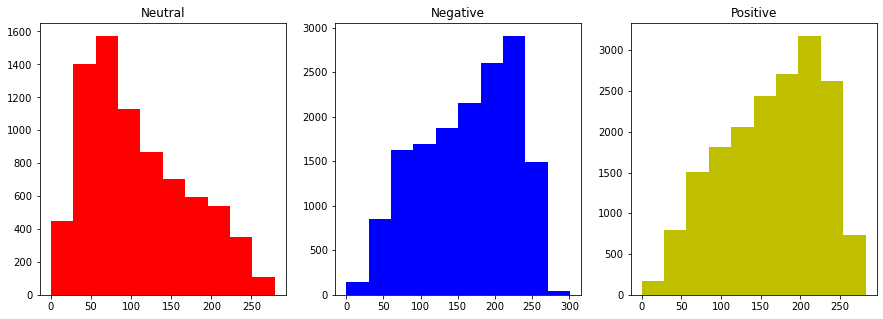

In [63]:
#Number of Character
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

tweet_len = train[train['Label']== '1']['Text'].str.len()
ax1.hist(tweet_len,color = 'r')
ax1.set_title('Neutral')

tweet_len = train[train['Label']== '0']['Text'].str.len()
ax2.hist(tweet_len, color='b')
ax2.set_title('Negative')

tweet_len = train[train['Label']== '2']['Text'].str.len()
ax3.hist(tweet_len, color = 'y')
ax3.set_title('Positive')

In [64]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text,Length,Label
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,111,1
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,237,2
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,131,2
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,306,2
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,310,0


### WordCloud

In [65]:
#Importing models for WordCloud 
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image

In [66]:
stopwords = set(STOPWORDS)

In [67]:
Negative_Text = train[train['Label']=='0']
Neutral_Text = train[train['Label']=='1']
Positive_Text = train[train['Label']=='2']

In [68]:
Positive_Text.Text

1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
5        as news of the regionâs first confirmed  case ...
6        cashier at grocery store was sharing his insig...
                               ...                        
41146    prices rose to a more than 7year high today du...
41148    uv light sterilizer sanitizer for your mask an...
41150    i never that weâd be in a situation amp world ...
41151    you are definitely my man i feel like this fal...
41154    you know itâs getting tough when   is rationin...
Name: Text, Length: 18046, dtype: object

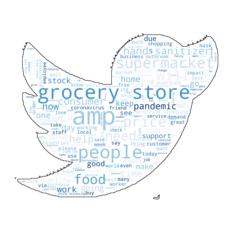

<Figure size 432x288 with 0 Axes>

In [69]:
Text_words =''

for val in Positive_Text.Text:
    
    #Converting text into strings
    val = str(val)
    
    #Split values to get words
    tokens = val.split()
    
    #Get the lowercase of the values
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    Text_words += ' '.join(tokens)+' '

custom_mask = np.array(Image.open(r'C:\Users\User\Desktop\Data Analysis\Saved\WordTwit.png'))
WC =WordCloud(width = 1000, height = 1000,
                contour_width = 3,
                contour_color = 'black',
                background_color ='white',
                colormap="Blues_r",
                mask = custom_mask, 
                stopwords = stopwords, 
                min_font_size = 10).generate(Text_words)
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig(r'C:\Users\User\Desktop\Data Analysis\Saved\Twit11')

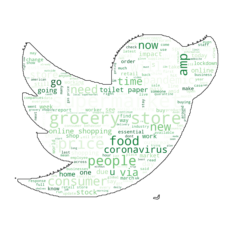

<Figure size 432x288 with 0 Axes>

In [70]:
Text_words =''

for val in Neutral_Text.Text:
    
    #Converting text into strings
    val = str(val)
    
    #Split values to get words
    tokens = val.split()
    
    #Get the lowercase of the values
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    Text_words += ' '.join(tokens)+' '
custom_mask = np.array(Image.open(r'C:\Users\User\Desktop\Data Analysis\Saved\WordTwit.png'))
WC =WordCloud(width = 800, height = 800, 
                contour_width = 3,
                contour_color = 'Black',
                background_color ='white',
                colormap="Greens_r",
                mask = custom_mask,
                stopwords = stopwords, 
                min_font_size = 10) .generate(Text_words)
plt.imshow(WC,interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig(r'C:\Users\User\Desktop\Data Analysis\Saved\Twit12')

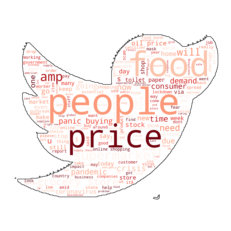

<Figure size 432x288 with 0 Axes>

In [71]:
Text_words =''

for val in Negative_Text.Text:
    
    #Converting text into strings
    val = str(val)
    
    #Split values to get words
    tokens = val.split()
    
    #Get the lowercase of the values
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    Text_words += ' '.join(tokens)+' '

custom_mask = np.array(Image.open(r'C:\Users\User\Desktop\Data Analysis\Saved\WordTwit.png'))
WC =WordCloud(width = 800, height = 800,
                contour_width = 3,
                contour_color = 'black',
                background_color ='white',
                colormap="Reds_r",
                stopwords = stopwords,
                mask = custom_mask,
                min_font_size = 10).generate(Text_words) 

plt.imshow(WC,interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig(r'C:\Users\User\Desktop\Data Analysis\Saved\Twit13')

## Text Vectorizing and Transformation

In [72]:
#Tfidf Vectorizer to vectorze the text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer

In [73]:
Data = pd.concat([train,test])
Data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text,Length,Label
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,111.0,1
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,237.0,2
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,131.0,2
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,306.0,2
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,310.0,0
...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16/03/2020,Meanwhile In A Supermarket in Israel -- People...,Positive,meanwhile in a supermarket in israel people d...,NaN,2
3794,3795,48747,"Farmington, NM",16/03/2020,Did you panic buy a lot of non-perishable item...,Negative,did you panic buy a lot of nonperishable items...,NaN,0
3795,3796,48748,"Haverford, PA",16/03/2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,asst prof of economics was on talking about ...,NaN,1
3796,3797,48749,NaN,16/03/2020,Gov need to do somethings instead of biar je r...,Extremely Negative,gov need to do somethings instead of biar je r...,NaN,0


## Tfidf transformation

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#Bag of Words transformation
X = train['Text'].tolist()
Y = train['Label'].tolist()
BOW_Transformer = CountVectorizer(strip_accents = 'unicode',stop_words = 'english').fit(X)
print(len(BOW_Transformer.vocabulary_))

49894


In [76]:
#Example

Ex1 = train[train['Location']=='Ghana']['Text'].iloc[0]
Ex1

'foreigner dragged out of supermarket after refusing to use hand sanitizer yet touching items on  shelves'

In [77]:
#Example
Ex1_BOW = BOW_Transformer.transform([Ex1])
print(Ex1_BOW)
print(Ex1_BOW.shape)

  (0, 15179)	1
  (0, 18711)	1
  (0, 20990)	1
  (0, 24273)	1
  (0, 36684)	1
  (0, 38621)	1
  (0, 39903)	1
  (0, 43030)	1
  (0, 45339)	1
  (0, 46940)	1
(1, 49894)


In [78]:
#Example
print(BOW_Transformer.get_feature_names()[15179])
print(BOW_Transformer.get_feature_names()[18711])
print(BOW_Transformer.get_feature_names()[20990])
print(BOW_Transformer.get_feature_names()[24273])
print(BOW_Transformer.get_feature_names()[36684])
print(BOW_Transformer.get_feature_names()[39903])
print(BOW_Transformer.get_feature_names()[43030])
print(BOW_Transformer.get_feature_names()[45339])
print(BOW_Transformer.get_feature_names()[46940])

dragged
foreigner
hand
items
refusing
shelves
supermarket
touching
use


In [79]:
#Bag of Words Transformation
features = BOW_Transformer.transform(X)

In [80]:
print(features.shape)

(41157, 49894)


In [81]:
print(features.nnz)

568383


In [82]:
#Tdidf transformation

tfidf = TfidfTransformer().fit(features)

In [83]:
#Example
Ex1_tfidf = tfidf.transform(Ex1_BOW)
print(Ex1_tfidf)

  (0, 46940)	0.2363622739903636
  (0, 45339)	0.34880824432847807
  (0, 43030)	0.13921225597519954
  (0, 39903)	0.21779361464771008
  (0, 38621)	0.1970120301211371
  (0, 36684)	0.3796940689159196
  (0, 24273)	0.24097394940251826
  (0, 20990)	0.19787247897262497
  (0, 18711)	0.5308971918681252
  (0, 15179)	0.4399959736023845


In [84]:
#Example
print(tfidf.idf_[BOW_Transformer.vocabulary_['use']])

4.867079093474763


In [85]:
#Tfidf transformation
X_feautres = tfidf.transform(features)

In [86]:
print('shape of transformed text', X_feautres.shape)
print(X_feautres.nnz)

shape of transformed text (41157, 49894)
568383


In [87]:
#Model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [88]:
X = X_feautres
Y = train['Label']
X_train,X_test,Y_train,Y_test = train_test_split(X_feautres, Y, test_size = 0.3, random_state = 101, shuffle = True, 
                                                 stratify = Y)

In [89]:

Y_pre_train = LSVC.predict(X_train)#Liner Support Component
LSVC = LinearSVC()
LSVC.fit(X_feautres,train['Label'])

Y_pre_test = LSVC.predict(X_test)

#Model Performance
print('The Accuracy score is %0.3f' % accuracy_score(Y_test,Y_pre_test))
print()
print(classification_report(Y_test,Y_pre_test))
print()
print(confusion_matrix(Y_test,Y_pre_test))

The Accuracy score is 0.968

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4620
           1       0.97      0.94      0.96      2314
           2       0.97      0.98      0.97      5414

    accuracy                           0.97     12348
   macro avg       0.97      0.96      0.97     12348
weighted avg       0.97      0.97      0.97     12348


[[4480   36  104]
 [  64 2169   81]
 [  84   21 5309]]


In [90]:
#Liner Support Component
LSVC_Pipeline = Pipeline([('BOW', CountVectorizer(analyzer= text_cleaning)),
                      ('tfidf', TfidfTransformer()),
                      ('Model', LinearSVC())])
LSVC_Pipeline.fit(train['Text'],train['Label'])
Test_Predictions = LSVC_Pipeline.predict(test['Text'])

#Performance
print('The Accuracy score is %0.3f' % accuracy_score(test['Label'],Test_Predictions))
print()
print(classification_report(test['Label'],Test_Predictions))
print()
print(confusion_matrix(test['Label'],Test_Predictions))

The Accuracy score is 0.457

              precision    recall  f1-score   support

           0       0.49      0.30      0.38      1633
           1       0.63      0.14      0.23       619
           2       0.43      0.74      0.55      1546

    accuracy                           0.46      3798
   macro avg       0.52      0.40      0.39      3798
weighted avg       0.49      0.46      0.42      3798


[[ 498   18 1117]
 [ 154   89  376]
 [ 364   34 1148]]


In [91]:
#Random Forest Classifer
RFC = RandomForestClassifier()
RFC.fit(X_feautres,train['Label'])

Y_pre_train = RFC.predict(X_train)
Y_pre_test = RFC.predict(X_test)

#Model Performance
print('The Accuracy score is %0.3f' % accuracy_score(Y_test,Y_pre_test))
print()
print(classification_report(Y_test,Y_pre_test))
print()
print(confusion_matrix(Y_test,Y_pre_test))

The Accuracy score is 1.000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4620
           1       1.00      1.00      1.00      2314
           2       1.00      1.00      1.00      5414

    accuracy                           1.00     12348
   macro avg       1.00      1.00      1.00     12348
weighted avg       1.00      1.00      1.00     12348


[[4618    2    0]
 [   0 2314    0]
 [   0    0 5414]]


In [92]:
#Random Forest Classifier
RFC_Pipeline = Pipeline([('BOW', CountVectorizer(analyzer= text_cleaning)),
                      ('tfidf', TfidfTransformer()),
                      ('Model', RandomForestClassifier())])
RFC_Pipeline.fit(train['Text'],train['Label'])
Test_Predictions = RFC_Pipeline.predict(test['Text'])

#Performance
print('The Accuracy score is %0.3f' % accuracy_score(test['Label'],Test_Predictions))
print()
print(classification_report(test['Label'],Test_Predictions))
print()
print(confusion_matrix(test['Label'],Test_Predictions))

The Accuracy score is 0.474

              precision    recall  f1-score   support

           0       0.49      0.38      0.43      1633
           1       0.57      0.28      0.38       619
           2       0.45      0.65      0.53      1546

    accuracy                           0.47      3798
   macro avg       0.50      0.44      0.45      3798
weighted avg       0.49      0.47      0.46      3798


[[628  60 945]
 [173 175 271]
 [474  74 998]]


In [93]:
#MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_feautres,train['Label'])

Y_pre_train = MNB.predict(X_train)
Y_pre_test = MNB.predict(X_test)

#Model Performance
print('The Accuracy score is %0.3f' % accuracy_score(Y_test,Y_pre_test))
print()
print(classification_report(Y_test,Y_pre_test))
print()
print(confusion_matrix(Y_test,Y_pre_test))

The Accuracy score is 0.736

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4620
           1       0.99      0.09      0.16      2314
           2       0.68      0.96      0.79      5414

    accuracy                           0.74     12348
   macro avg       0.83      0.62      0.59     12348
weighted avg       0.79      0.74      0.68     12348


[[3716    0  904]
 [ 542  205 1567]
 [ 240    2 5172]]


In [94]:
#MultinomialNB
MNB_Pipeline = Pipeline([('BOW', CountVectorizer(analyzer= text_cleaning)),
                      ('tfidf', TfidfTransformer()),
                      ('Model', MultinomialNB())])
MNB_Pipeline.fit(train['Text'],train['Label'])
Test_Predictions = MNB_Pipeline.predict(test['Text'])

#Performance
print('The Accuracy score is %0.3f' % accuracy_score(test['Label'],Test_Predictions))
print()
print('Classification Report')
print(classification_report(test['Label'],Test_Predictions))
print()
print('Confusion Matrix')
print(confusion_matrix(test['Label'],Test_Predictions))

The Accuracy score is 0.408

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1633
           1       0.50      0.00      0.00       619
           2       0.41      1.00      0.58      1546

    accuracy                           0.41      3798
   macro avg       0.47      0.33      0.19      3798
weighted avg       0.46      0.41      0.24      3798


Confusion Matrix
[[   2    1 1630]
 [   1    1  617]
 [   1    0 1545]]
